In [104]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import string
import gensim
from gensim import corpora, models
from gensim.models import CoherenceModel
import matplotlib.pyplot as plt

In [16]:
questions = pd.read_csv('../../data/questions.csv')
questions.head()

,question
0,Kent u het onderzoek van CorporatieNL en USP M...
1,Wat zijn volgens u de oorzaken dat maar liefst...
2,Hoe verklaart u dat slechts 9% van de huurders...
3,Bent u van mening dat gemeenten en woningcorpo...
4,Kunt u alsnog antwoord geven op de vraag wat u...


## Data Cleaning

In [28]:
stop = set(stopwords.words('dutch'))

In [47]:
exclude = set(string.punctuation)
lemma = WordNetLemmatizer()

def clean(doc):
    stop_free = " ".join([i for i in doc.lower().split() if i not in stop])
    punc_free = ''.join(ch for ch in stop_free if ch not in exclude)
    normalized = " ".join(lemma.lemmatize(word) for word in punc_free.split())
    return normalized

questions_clean = [clean(q) for q in questions['question']]        


In [48]:
questions.head()

,question
0,Kent u het onderzoek van CorporatieNL en USP M...
1,Wat zijn volgens u de oorzaken dat maar liefst...
2,Hoe verklaart u dat slechts 9% van de huurders...
3,Bent u van mening dat gemeenten en woningcorpo...
4,Kunt u alsnog antwoord geven op de vraag wat u...


In [49]:
questions_clean[0:6]

['kent onderzoek corporatienl usp marketing consultancy medewerkers woningcorporaties wijkbewoners waaruit somber beeld opdoemt reactie daarop',
 'volgens oorzaken liefst 50 corporatieprofessionals zegt leefbaarheid wijken corporatiebezit afgelopen twee jaar achteruit gegaan kunt antwoord toelichten',
 'verklaart slechts 9 huurders vooruitgang wijk ziet terwijl 30 huurders spreekt achteruitgang leefbaarheid',
 'bent mening gemeenten woningcorporaties voldoende mogelijkheden wijken leefbaar veilig houden maken eerder schreef ‘via wet regelgeving geregeld heeft lokale partijen instrumentarium zorg invulling geven kunt antwoord toelichten',
 'kunt alsnog antwoord geven vraag gaat ruim 700000 mensen buurt wonen onvoldoende scoort gebied leefbaarheid indien gaat doen kunt toelichten',
 'kunt uitleggen sind 2012 gebeurd leefbaarheid veiligheid wijken vergroten onderzoekers geconstateerd leefbaarheid wijken eerder gelabeld ‘probleemwijk’ ‘krachtwijk’ ‘aandachtswijk’ gestagneerd']

## Topic Modelling

In [50]:
vectorizer = CountVectorizer(lowercase=True)
questions_vectorized = vectorizer.fit_transform(questions_clean)

In [79]:
vocab = vectorizer.get_feature_names()

In [51]:
lda = LatentDirichletAllocation(n_components=10, max_iter=10, learning_method='online',verbose=True)
data_lda = lda.fit_transform(questions_vectorized)

iteration: 1 of max_iter: 10
iteration: 2 of max_iter: 10
iteration: 3 of max_iter: 10
iteration: 4 of max_iter: 10
iteration: 5 of max_iter: 10
iteration: 6 of max_iter: 10
iteration: 7 of max_iter: 10
iteration: 8 of max_iter: 10
iteration: 9 of max_iter: 10
iteration: 10 of max_iter: 10


In [52]:
# Functions for printing keywords for each topic
def selected_topics(model, vectorizer, top_n=10):
    for idx, topic in enumerate(model.components_):
        print("Topic %d:" % (idx))
        print([(vectorizer.get_feature_names()[i], topic[i])
                        for i in topic.argsort()[:-top_n - 1:-1]]) 

In [53]:
print("LDA Model:")
selected_topics(lda, vectorizer)

LDA Model:
Topic 0:
[('zembla', 1.1155510559779716), ('vluchtelingen', 1.1121263848866334), ('juist', 1.1056026407996664), ('hele', 1.1055716784398344), ('nederland', 1.1032006034228532), ('vluchtelingenkinderen', 1.1020891569137001), ('gevallen', 1.0982489551698171), ('welkom', 1.095523510694755), ('30', 1.0917990533593698), ('reactie', 1.0883394182807713)]
Topic 1:
[('gaat', 2.7267021144000436), ('kunt', 2.676519400602411), ('groot', 1.8887152643351424), ('welke', 1.88780397351835), ('pogingen', 1.8757177512350869), ('betreft', 1.87183753676599), ('zoals', 1.1371654711934107), ('waaruit', 1.1327409078009503), ('wonen', 1.1230878745877901), ('ministerie', 1.1227568218221389)]
Topic 2:
[('waarom', 2.7250377701982433), ('mening', 1.9092304506466007), ('rechten', 1.9055926410325346), ('huidige', 1.9019170989058136), ('bent', 1.900816883870706), ('welke', 1.8888185257069665), ('heer', 1.8884047734473188), ('singh', 1.886940765335194), ('vertrouwelijk', 1.1396934399317575), ('chantage', 1.

In [80]:
topic_words = {}

for topic, comp in enumerate(lda.components_):
    # for the n-dimensional array "arr":
    # argsort() returns a ranked n-dimensional array of arr, call it "ranked_array"
    # which contains the indices that would sort arr in a descending fashion
    # for the ith element in ranked_array, ranked_array[i] represents the index of the
    # element in arr that should be at the ith index in ranked_array
    # ex. arr = [3,7,1,0,3,6]
    # np.argsort(arr) -> [3, 2, 0, 4, 5, 1]
    # word_idx contains the indices in "topic" of the top num_top_words most relevant
    # to a given topic ... it is sorted ascending to begin with and then reversed (desc. now)    
    word_idx = np.argsort(comp)[::-1][:10]

    # store the words most relevant to the topic
    topic_words[topic] = [vocab[i] for i in word_idx]


In [81]:
for topic, words in topic_words.items():
    print('Topic: %d' % topic)
    print('  %s' % ', '.join(words))

Topic: 0
  zembla, vluchtelingen, juist, hele, nederland, vluchtelingenkinderen, gevallen, welkom, 30, reactie
Topic: 1
  gaat, kunt, groot, welke, pogingen, betreft, zoals, waaruit, wonen, ministerie
Topic: 2
  waarom, mening, rechten, huidige, bent, welke, heer, singh, vertrouwelijk, chantage
Topic: 3
  vraag, geven, toelichting, ontkennend, evenwichtige, kunt, overeenstemming, bestendig, premiedekkingsgraad, beantwoordt
Topic: 4
  ministerie, ontvangen, buitenland, gedetineerden, komen, honderd, langer, kennisgenomen, weigert, ver
Topic: 5
  ministerie, bewijzen, toelichten, lokale, regelgeving, plaatsen, houden, belemmeren, stellen, mening
Topic: 6
  premieregeling, hele, inspanningsverplichtingen, verwacht, bericht, grens, houden, inspanningsverplichting, gevallen, buitenland
Topic: 7
  wijken, leefbaarheid, bereid, bent, inkomensgrens, 30, sociale, mogelijk, acht, jaar
Topic: 8
  reactie, vanuit, prisonlaw, gevonden, onafhankelijkheid, opdoemt, leiden, kunt, daarop, subsidie
Topi

## Gensim

In [56]:
questions_clean = [clean(q).split() for q in questions['question']]

In [61]:
# Build a Dictionary - association word to numeric id
dictionary = corpora.Dictionary(questions_clean)
 
# Transform the collection of texts to a numerical form
corpus = [dictionary.doc2bow(text) for text in questions_clean]
 
# Have a look at how the 20th document looks like: [(word_id, count), ...]
# print(corpus[20])
# [(12, 3), (14, 1), (21, 1), (25, 5), (30, 2), (31, 5), (33, 1), (42, 1), (43, 2),  ...
 
# Build the LDA model
lda_model = models.LdaModel(corpus=corpus, num_topics=10, id2word=dictionary)
 
# Build the LSI model
lsi_model = models.LsiModel(corpus=corpus, num_topics=10, id2word=dictionary)

[(55, 1), (157, 1), (175, 1), (180, 1), (257, 1), (258, 1), (259, 1), (260, 1), (261, 1), (262, 1)]


In [66]:
print("LDA Model:")
 
for idx in range(10):
    # Print the first 10 most representative topics
    print("Topic #%s:" % idx, lda_model.print_topic(idx, 10))
 
print("=" * 20)
 
print("LSI Model:")
 
for idx in range(10):
    # Print the first 10 most representative topics
    print("Topic #%s:" % idx, lsi_model.print_topic(idx, 10))
 
print("=" * 20)


LDA Model:
Topic #0: 0.032*"kunt" + 0.027*"gaat" + 0.024*"toelichten" + 0.018*"betreft" + 0.016*"leefbaarheid" + 0.015*"antwoord" + 0.015*"corporatieprofessionals" + 0.014*"wijken" + 0.012*"alsnog" + 0.010*"waar"
Topic #1: 0.015*"bent" + 0.015*"ministerie" + 0.015*"30" + 0.015*"komen" + 0.015*"medisch" + 0.015*"subquotum" + 0.015*"buitenland" + 0.015*"welke" + 0.015*"subsidie" + 0.008*"zaken"
Topic #2: 0.022*"inkomensgrens" + 0.017*"waarom" + 0.016*"huurwoningen" + 0.015*"sociale" + 0.014*"grens" + 0.014*"verhogen" + 0.014*"organisatie" + 0.014*"zoek" + 0.013*"behartigen" + 0.013*"buitenlandse"
Topic #3: 0.023*"rendement" + 0.017*"kunt" + 0.016*"toepassing" + 0.016*"verwachte" + 0.016*"verwacht" + 0.016*"zowel" + 0.016*"pensioenuitkering" + 0.015*"gebeurd" + 0.014*"leefbaarheid" + 0.014*"wijken"
Topic #4: 0.022*"brief" + 0.013*"bent" + 0.013*"bereid" + 0.013*"deelnemers" + 0.013*"unhcr" + 0.013*"pensioenwet" + 0.013*"rekenrente" + 0.013*"risico" + 0.013*"incalculeert" + 0.013*"voorstel

In [70]:
text = "Kunt u de achtergrond schetsen op basis waarvan de Nederlandse Vereniging voor Medische Oncologie (NVMO) een negatief heeft uitgebracht over het middel nivolumab?"
bow = dictionary.doc2bow(clean(text).split())
 
print(lsi_model[bow])

print(lda_model[bow])

[(0, 0.3206549979209987), (1, -0.2142180438773666), (2, -0.04275736033646617), (3, -0.177318395433087), (4, 0.2593368115205715), (5, 0.02203424522400972), (6, 0.17702817749716546), (7, -0.10571910206444612), (8, -0.3083858532789294), (9, 0.012834734387054389)]
[(0, 0.016673947), (1, 0.31460294), (2, 0.016666668), (3, 0.016670099), (4, 0.1960531), (5, 0.016669383), (6, 0.01666851), (7, 0.016666668), (8, 0.3726591), (9, 0.016669622)]


In [86]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=questions_clean, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -6.806349164106715

Coherence Score:  0.4522677814905346


## Mallet LDA

In [106]:
NUM_TOPICS = 12

In [109]:
mallet_path = '../../src/backend/libs/mallet-2.0.8/bin/mallet' # update this path
ldamallet = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=NUM_TOPICS, id2word=dictionary)

In [110]:
coherence_model_ldamallet = CoherenceModel(model=ldamallet, texts=questions_clean, dictionary=dictionary, coherence='c_v')
coherence_ldamallet = coherence_model_ldamallet.get_coherence()
print('\nCoherence Score: ', coherence_ldamallet)


Coherence Score:  0.7229258855548935


In [111]:
print("Mallet LDA Model:")
 
for idx in range(NUM_TOPICS):
    # Print the first 10 most representative topics
    print("Topic #%s:" % idx, ldamallet.print_topic(idx, NUM_TOPICS))

Mallet LDA Model:
Topic #0: 0.074*"toepassing" + 0.056*"zoals" + 0.037*"nominale" + 0.037*"rts" + 0.037*"vanwege" + 0.019*"unhcr" + 0.019*"alleen" + 0.019*"plaatsen" + 0.019*"1" + 0.019*"manieren" + 0.019*"juist" + 0.019*"voorzien"
Topic #1: 0.120*"toelichten" + 0.080*"welke" + 0.040*"tekorten" + 0.040*"pensioengerechtigden" + 0.020*"economische" + 0.020*"minstens" + 0.020*"uitleggen" + 0.020*"onafhankelijkheid" + 0.020*"pensioenstelsel" + 0.020*"“het" + 0.020*"maken" + 0.020*"zogenoemde"
Topic #2: 0.136*"prisonlaw" + 0.091*"leiden" + 0.068*"heer" + 0.068*"rekenrente" + 0.045*"5" + 0.045*"vertrouwensbreuk" + 0.045*"grens" + 0.045*"praktijk" + 0.023*"pensioengerechtigden" + 0.023*"eu" + 0.023*"volgende" + 0.023*"indexeren"
Topic #3: 0.111*"buitenlandse" + 0.074*"kunt" + 0.074*"30" + 0.056*"inkomensgrens" + 0.037*"huurders" + 0.037*"unhcr" + 0.037*"medische" + 0.019*"2018" + 0.019*"beter" + 0.019*"maximaal" + 0.019*"wenselijk" + 0.019*"chantage"
Topic #4: 0.074*"rendement" + 0.056*"welke

In [112]:
x = ldamallet.show_topics(num_topics=10, num_words=10,formatted=False)
topics_words = [(tp[0], [wd[0] for wd in tp[1]]) for tp in x]

#Below Code Prints Topics and Words
for topic,words in topics_words:
    print(str(topic)+ ":"+ str(words))
print()

#Below Code Prints Only Words 
for topic,words in topics_words:
    print(" ".join(words))

5:['bent', 'vanuit', 'slechts', 'woningcorporaties', 'corporatieprofessionals', 'huurwoningen', 'acht', 'sprake', 'financiering', '2012']
8:['kunt', 'mogelijk', 'genoemde', 'waarde', 'geval', 'mening', 'onrechtvaardig', 'hoog', 'nederlander', 'ingeruimd']
4:['rendement', 'welke', 'sociale', 'waar', 'klopt', 'verwachte', 'beide', 'verhogen', 'dezelfde', 'groot']
9:['leefbaarheid', 'terwijl', 'huidige', 'buitenland', 'gedetineerden', 'deelt', 'pogingen', 'singh', 'onderzoek', 'partner']
1:['toelichten', 'welke', 'tekorten', 'pensioengerechtigden', 'economische', 'minstens', 'uitleggen', 'onafhankelijkheid', 'pensioenstelsel', '“het']
7:['ministerie', 'waarom', 'zaken', 'worden', 'pensioenuitkering', 'verwacht', 'teller', 'advocaat', 'gewenst', 'heer']
2:['prisonlaw', 'leiden', 'rekenrente', 'heer', 'praktijk', 'grens', 'vertrouwensbreuk', '5', 'eu', 'volgende']
10:['mening', 'bereid', 'pensioenwet', 'nederland', 'knot', 'bent', 'wel', 'president', 'welkom', 'inspanningsverplichting']
0:[

### Topic of sentence

In [117]:
def format_topics_sentences(texts, ldamodel=lda_model, corpus=corpus):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=ldamallet, corpus=corpus, texts=questions_clean)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

# Show
df_dominant_topic.head(10)


,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,8.0,0.1085,"kunt, mogelijk, genoemde, waarde, geval, menin...","[kent, onderzoek, corporatienl, usp, marketing..."
1,1,6.0,0.1633,"wijken, antwoord, deelnemers, reactie, beantwo...","[volgens, oorzaken, liefst, 50, corporatieprof..."
2,2,3.0,0.1120,"buitenlandse, kunt, 30, inkomensgrens, medisch...","[verklaart, slechts, 9, huurders, vooruitgang,..."
3,3,11.0,0.1205,"vraag, geven, zowel, gaat, indien, subquotum, ...","[bent, mening, gemeenten, woningcorporaties, v..."
4,4,11.0,0.1563,"vraag, geven, zowel, gaat, indien, subquotum, ...","[kunt, alsnog, antwoord, geven, vraag, gaat, r..."
5,5,9.0,0.1071,"leefbaarheid, terwijl, huidige, buitenland, ge...","[kunt, uitleggen, sind, 2012, gebeurd, leefbaa..."
6,6,1.0,0.1274,"toelichten, welke, tekorten, pensioengerechtig...","[welke, aanpassingen, passend, toewijzen, acht..."
7,7,3.0,0.1215,"buitenlandse, kunt, 30, inkomensgrens, medisch...","[waarom, stelt, mogelijk, inkomensgrens, socia..."
8,8,1.0,0.1204,"toelichten, welke, tekorten, pensioengerechtig...","[welke, manieren, gaat, ervoor, zorgen, wijken..."
9,9,6.0,0.1062,"wijken, antwoord, deelnemers, reactie, beantwo...","[kunt, vragen, beantwoorden, wetgevingsoverleg..."


In [119]:
df_dominant_topic.iloc[0]['Text']

['kent', 'onderzoek', 'corporatienl', 'usp', 'marketing', 'consultancy', 'medewerkers', 'woningcorporaties', 'wijkbewoners', 'waaruit', 'somber', 'beeld', 'opdoemt', 'reactie', 'daarop']

In [120]:
df_dominant_topic.iloc[0]['Keywords']

'kunt, mogelijk, genoemde, waarde, geval, mening, onrechtvaardig, hoog, nederlander, ingeruimd'

## Hyperparameter Tuning

In [102]:
# Number of topics
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=num_topics, id2word=dictionary)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=corpus, texts=questions_clean, start=2, limit=15, step=2)

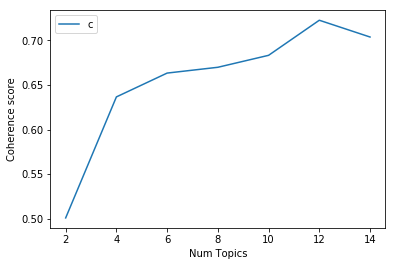

In [105]:
# Show graph
limit=15; start=2; step=2;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()